In [3]:
import data
import importlib
importlib.reload(data)

ModuleNotFoundError: No module named 'data'

In [396]:
from data import dframe 
import pandas as pd
import plotly.plotly as py
import plotly.offline as pyo
import  plotly.graph_objs as go

In [14]:
pyo.offline.init_notebook_mode(connected=True)

In [397]:
# filter Baltimore City Public Schools out of data
dframe = dframe[dframe['agency'] != 'BCPS']
dframe.head(3)


,agency,year,funding,program,stipend,fringe,unemployment,BaltCorps_fee,StrongCity_fee,fellow_cost,fellows_count,annual_spending_by_agency
2014-01-01,Mayor's Office,2014,BoE,Fellowship,32000,7040,1000,2000,2000,44040,2,88080.0
2014-01-01,Mayor's Office,2014,BoE,Fellowship,32000,7040,1000,2000,2000,44040,2,88080.0
2015-01-01,MOED,2015,BoE,Fellowship,33000,7260,1000,2000,2000,45260,2,90520.0


###  <font color=blue>Total Spending & Volume of City Government Fellows </font>

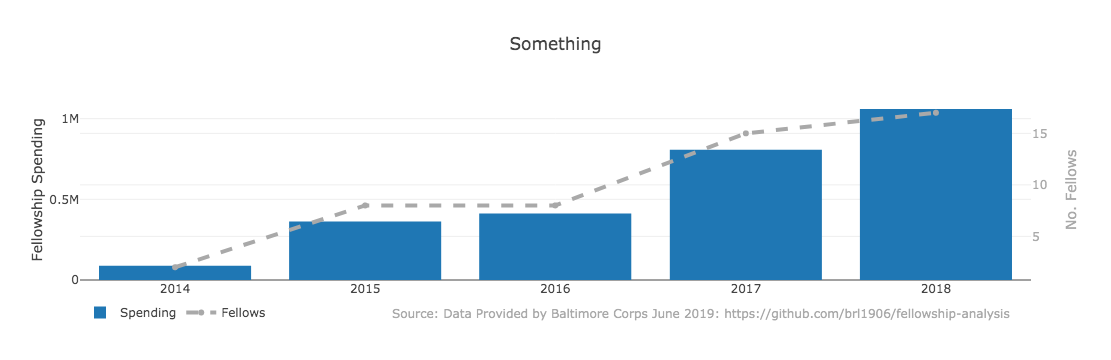

In [445]:
## TODO: style the chart use fmdview as guide
trace1 = go.Bar(
    x = dframe.groupby(dframe.index)['fellow_cost'].sum().index,
    y = dframe.groupby(dframe.index)['fellow_cost'].sum().values,
    name = 'Spending'
)
trace2 = go.Scatter(
    x = dframe.groupby(dframe.index)['agency'].count().index,
    y = dframe.groupby(dframe.index)['agency'].count().values,
    name = 'Fellows',
    line = {'color':'darkgrey',
           'width':4,
           'dash':'dash'},
    yaxis = 'y2'
)

layout = {
    'legend':{'orientation':'h'},
    'title':'Something',
    'yaxis': {'title':'Fellowship Spending'},
    'yaxis2':{'title':'No. Fellows',
             'titlefont':{'color':'darkgrey'},
             'tickfont':{'color':'darkgrey'},
             'overlaying':'y',
             'side':'right'},
    'xaxis': {'tickmode':'auto',
             'nticks': dframe.index.nunique()},
    'annotations':[
            {
                'font':{'size':12,
                       'color':'darkgrey'},
                'showarrow':False,
                'text': 'Source: Data Provided by Baltimore Corps June 2019: https://github.com/brl1906/fellowship-analysis',
                'xref':'paper',
                'yref':'paper',
                'x':.98,
                'y':-.24}
        ]
}

fig = {'data':[trace1,trace2], 'layout':layout}
pyo.iplot(fig)

## <font color=blue> Distribution of use across agencies.</font>



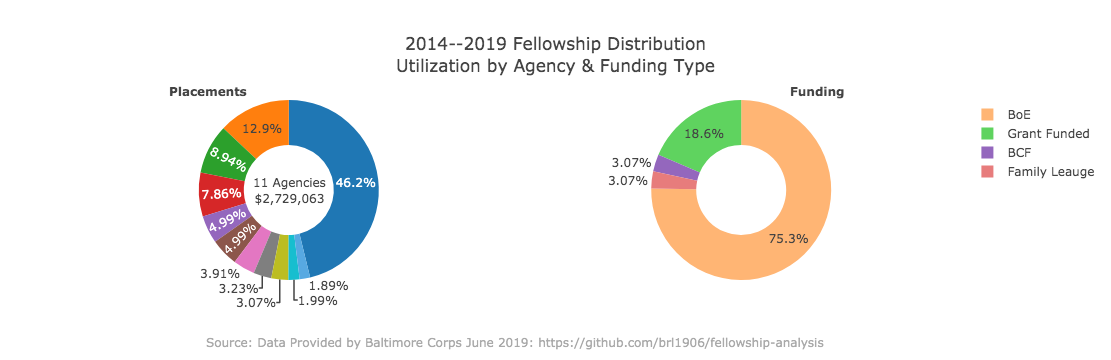

In [342]:
## TODO: format colors
fig = {
    'data':[
        {
            'hole':.5,
            'labels': dframe.groupby('agency')['fellow_cost'].sum().index,
            'showlegend':False,
            'type':'pie',
            'domain':{'x': [0, .48]},
            'name':'total spending',
            'values':dframe.groupby('agency')['fellow_cost'].sum().values},
        {
            'hole':.5,
            'labels': dframe.groupby('funding')['fellow_cost'].sum().index,
            'showlegend':True,
            'type':'pie',
            'domain':{'x':[.52, 1]},
            'name':'funding sources',
            'values':dframe.groupby('funding')['fellow_cost'].sum().values}],
    
    'layout': {
    'title':'2014--2019 Fellowship Distribution<br>Utilization by Agency & Funding Type',
    'hovermode':'closest',
    'annotations': [
        {
            'font':{'size':12},
            'showarrow':False,
            'text':'{} Agencies<br>${:,.0f}'.format(dframe['agency'].nunique(),
                                                    dframe['fellow_cost'].sum()),
            'x':.197,
            'y':.5
        },
        {
            'font':{'size':12},
            'showarrow':False,
            'text':'<b>Placements</b>',
            'x':.10,
            'y':1.1
        },
        {
            'font':{'size':12},
            'showarrow':False,
            'text':'<b>Funding</b>',
            'x':.88,
            'y':1.1
        },
        {
                'font':{'size':12,
                       'color':'darkgrey'},
                'showarrow':False,
                'text': 'Source: Data Provided by Baltimore Corps June 2019: https://github.com/brl1906/fellowship-analysis',
                'x':.5,
                'y':-.4}
                    ]}
}

pyo.iplot(fig)

## <font color=blue>Fellowship cost components. What components make up fellow cost  (What impact would a fees rate decrease have if the City  could lock into similar rates across Fellowship providers?).</font>


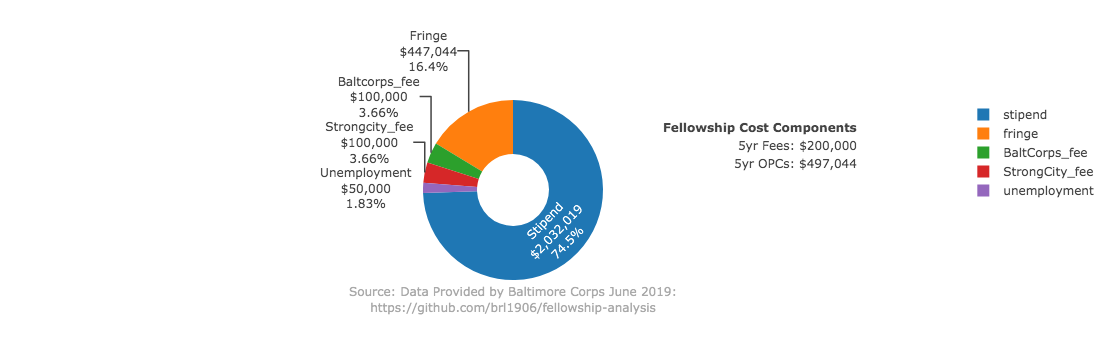

In [362]:

labels = ['stipend','fringe','unemployment','BaltCorps_fee','StrongCity_fee']
values = []
for label in labels:
    values.append(dframe[label].sum())

text = []
for label,value in zip(labels,values):
    text.append('{}<br>${:,.0f}'.format(label.capitalize(),value))

fig = {
    'data':[
        {'labels': labels,
        'values': values,
         'name': 'cost components',
         'hole': .4,
         'type': 'pie',
         'text': text,
         'hoverinfo':'text+percent'
        }],
    'layout': {
        'hovermode': 'closest',
        'annotations': [
            {
                'font':{'size':12},
                'showarrow':False,
                'text': '<b>Fellowship Cost Components</b>',
                'x':.9,
                'y':.9},
            {
                'font':{'size':12},
                'showarrow':False,
                'text': '5yr Fees: ${:,.0f}'.format(dframe['BaltCorps_fee'].sum() + dframe['StrongCity_fee'].sum()),
                'x':.9,
                'y':.8},
            {
                'font':{'size':12},
                'showarrow':False,
                'text': '5yr OPCs: ${:,.0f}'.format(dframe['fringe'].sum() + dframe['unemployment'].sum()),
                'x':.9,
                'y':.7},
            {
                'font':{'size':12,
                       'color':'darkgrey'},
                'showarrow':False,
                'text': 'Source: Data Provided by Baltimore Corps June 2019:<br>https://github.com/brl1906/fellowship-analysis',
                'x':.5,
                'y':-.2},
            
        ]
    }
}

pyo.iplot(fig)

## <font color=blue>Changes in fellowship use and cost overtime by agency</font>

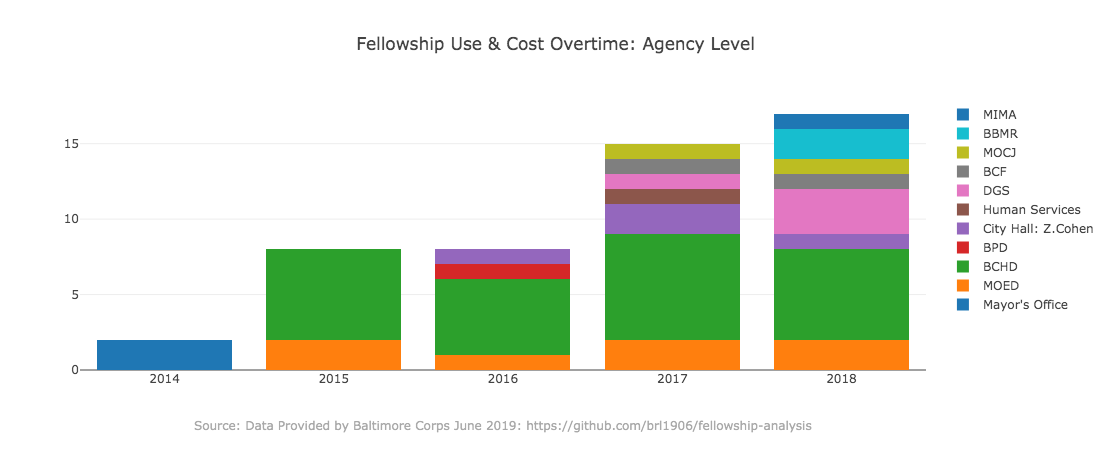

In [470]:
## TODO: set color scheme and style consistent with other charts, add hovertext as agency, fellows, spending

traces = []

for agncy in dframe['agency'].unique():
    traces.append(go.Bar(
        x = (dframe[dframe['agency'] == agncy].
             groupby(dframe[dframe['agency'] == agncy].
                     index)['fellows_count'].mean().index),
        y = (dframe[dframe['agency'] == agncy].
             groupby(dframe[dframe['agency'] == agncy].
                     index)['fellows_count'].mean().values),
        name = agncy,
        

    ))

fig = {
    'data':traces,
    'layout': {
        'title': 'Fellowship Use & Cost Overtime: Agency Level',
        'hovermode':'closest',
        'barmode': 'stack',
        'xaxis':{'nticks':dframe.index.nunique()},
        'legend':{'orientation':'v'},
        'annotations':[
            {
                'font':{'size':12,
                       'color':'darkgrey'},
                'showarrow':False,
                'text': 'Source: Data Provided by Baltimore Corps June 2019: https://github.com/brl1906/fellowship-analysis',
                'xref':'paper',
                'yref':'paper',
                'x':.5,
                'y':-.24}
        ]
    }}

pyo.iplot(fig)